In [3]:
import os
f = r"cpg"
first_file = os.path.join(f, "average_covariance_between_cpg_CRC11_chr_1_region_NCandA1.bedgraph")
second_file = os.path.join(f,"average_covariance_between_cpg_CRC11_chr_1_region_NCandA2.bedgraph")
third_file = os.path.join(f,"average_covariance_between_cpg_CRC11_chr_1_region_NCandB.bedgraph")

pmd_dict_mu = {}

In [4]:
import pandas as pd
import numpy as np
import pickle

In [9]:
def get_covariance_pmd_df(bedgraph_path, chromosome):
    covariance_df = pd.read_csv(bedgraph_path, sep="\t", names=["chr", "start", "end", "coverage"],
                                usecols=["start", "coverage"], index_col="start")

    pmd_dict = read_pmd_dict(os.path.join(f,"pmd_dict.pickle"))
    pmd_list = pmd_dict[chromosome]
    prev_mask = None
    for pmd_tuple in pmd_list:
        start, end = pmd_tuple
        pmd_mask = (covariance_df.index >= start) & (covariance_df.index <= end)
        prev_mask = np.logical_or(pmd_mask, prev_mask) if prev_mask is not None else pmd_mask

    return covariance_df.loc[prev_mask, :]

In [10]:
def read_pmd_dict(file_path=(os.path.join(f,"pmd_dict.pickle"))):
    if pmd_dict_mu != {}:
        return pmd_dict_mu

    with open(file_path, "rb") as pmd_dict_f:
        pmd_dict = pickle.load(pmd_dict_f)

        return pmd_dict

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kde
plt.style.use('seaborn')

In [11]:
first_df = get_covariance_pmd_df(first_file, "chr1")
second_df = get_covariance_pmd_df(second_file, "chr1")
third_df = get_covariance_pmd_df(third_file, "chr1")

third_df = third_df[third_df.coverage < 0.2]
third_df = third_df[third_df.coverage > 0]

first_df = first_df[first_df.coverage < 0.2]
first_df = first_df[first_df.coverage > 0]

second_df = second_df[second_df.coverage < 0.2]
second_df = second_df[second_df.coverage > 0]

indexes12 = first_df.index.intersection(second_df.index)
indexes13 = first_df.index.intersection(third_df.index)

first_df12 = first_df.filter(indexes12, axis=0)
second_df12 = second_df.filter(indexes12, axis=0)

first_df13 = first_df.filter(indexes13, axis=0)
third_df13 = third_df.filter(indexes13, axis=0)


vo12 = np.hstack((first_df12._values, second_df12._values))
df12 = pd.DataFrame(data=vo12,  columns=["x", "y"])


vo13 = np.hstack((first_df13._values, third_df13._values))
df13 = pd.DataFrame(data=vo13,  columns=["x", "y"])

c:\users\dror bar\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


c:\users\dror bar\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [13]:
dfs12 = df12.sample(frac=1)
dfs12.shape[0]

153303

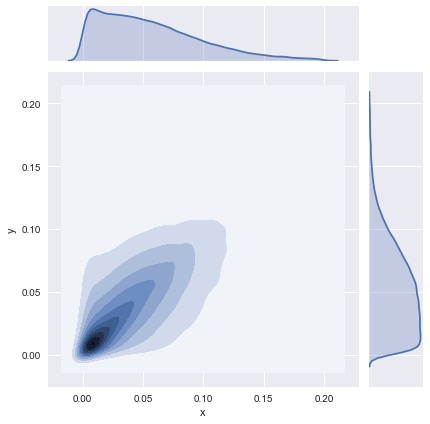

In [14]:
sns.jointplot(x="x", y="y", data=dfs12, kind="kde")

In [16]:
dfs13 = df13.sample(frac=1)
dfs13.shape[0]

143896

In [17]:
sns.jointplot(x="x", y="y", data=dfs13, kind="kde");

In [154]:
pmd_first = get_covariance_pmd_df(first_file, "chr1")
pmd_first.describe()

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,coverage
count,412408.000000
mean,0.026966
std,0.052127
min,-0.315789
25%,0.000000
50%,0.000000
75%,0.045184
max,0.500000


In [141]:
pmd_first.quantile(0.9)

coverage    0.092937
Name: 0.9, dtype: float64

In [167]:
pmd = pmd_first[pmd_first.coverage>=0]
pmd = pmd[pmd.coverage<0.2]

In [168]:
pmd.describe()

,coverage
count,357563.000000
mean,0.029325
std,0.041697
min,0.000000
25%,0.000000
50%,0.003646
75%,0.050000
max,0.199713


In [194]:
pmd_without_zero = pmd[pmd.coverage>0] 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48804675c0>]],
      dtype=object)

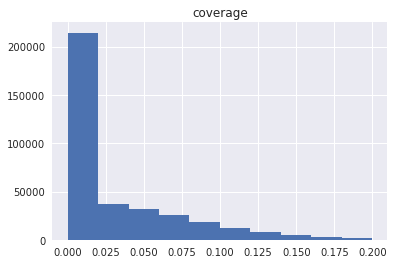

In [198]:
pmd.hist()

In [232]:
first_df = get_covariance_pmd_df(first_file, "chr1")
second_df = get_covariance_pmd_df(second_file, "chr1")
third_df = get_covariance_pmd_df(third_file, "chr1")

third_df = third_df[third_df.coverage < 0.1]
third_df = third_df[third_df.coverage > 0]

first_df = first_df[first_df.coverage < 0.1]
first_df = first_df[first_df.coverage > 0]

second_df = second_df[second_df.coverage < 0.1]
second_df = second_df[second_df.coverage > 0]

indexes12 = first_df.index.intersection(second_df.index)
indexes13 = first_df.index.intersection(third_df.index)

first_df12 = first_df.filter(indexes12, axis=0)
second_df12 = second_df.filter(indexes12, axis=0)

first_df13 = first_df.filter(indexes13, axis=0)
third_df13 = third_df.filter(indexes13, axis=0)


vo12 = np.hstack((first_df12._values, second_df12._values))
df12 = pd.DataFrame(data=vo12,  columns=["x", "y"])


vo13 = np.hstack((first_df13._values, third_df13._values))
df13 = pd.DataFrame(data=vo13,  columns=["x", "y"])

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


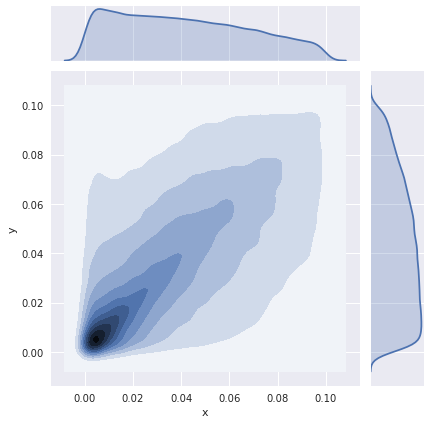

In [233]:
sns.jointplot(x="x", y="y", data=df12, kind="kde");

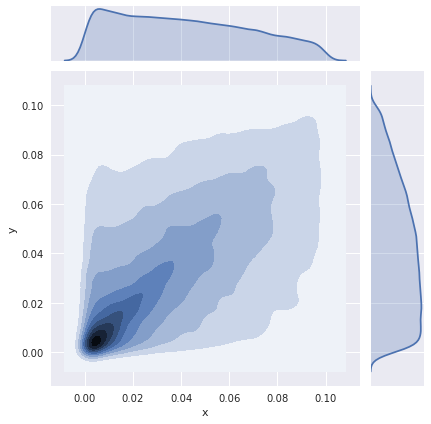

In [234]:
sns.jointplot(x="x", y="y", data=df13, kind="kde");

In [238]:
first_df = get_covariance_pmd_df(first_file, "chr1")
second_df = get_covariance_pmd_df(second_file, "chr1")
third_df = get_covariance_pmd_df(third_file, "chr1")

third_df = third_df[third_df.coverage < 0.05]
third_df = third_df[third_df.coverage > 0]

first_df = first_df[first_df.coverage < 0.05]
first_df = first_df[first_df.coverage > 0]

second_df = second_df[second_df.coverage < 0.05]
second_df = second_df[second_df.coverage > 0]

indexes12 = first_df.index.intersection(second_df.index)
indexes13 = first_df.index.intersection(third_df.index)

first_df12 = first_df.filter(indexes12, axis=0)
second_df12 = second_df.filter(indexes12, axis=0)

first_df13 = first_df.filter(indexes13, axis=0)
third_df13 = third_df.filter(indexes13, axis=0)


vo12 = np.hstack((first_df12._values, second_df12._values))
df12 = pd.DataFrame(data=vo12,  columns=["x", "y"])


vo13 = np.hstack((first_df13._values, third_df13._values))
df13 = pd.DataFrame(data=vo13,  columns=["x", "y"])

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


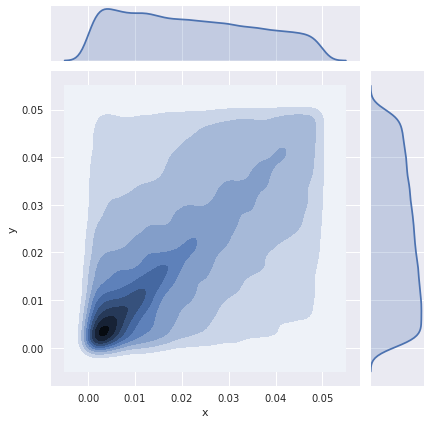

In [239]:
sns.jointplot(x="x", y="y", data=df12, kind="kde");

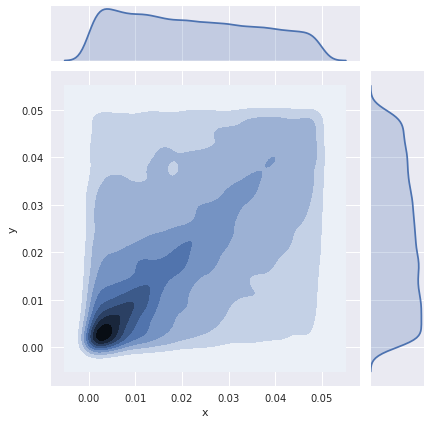

In [240]:
sns.jointplot(x="x", y="y", data=df13, kind="kde");